## Handwriting Character Recognition model using the EMNIST dataset
 **Download the Dataset**: [Download EMNIST dataset](https://www.kaggle.com/datasets/crawford/emnist?resource=download).



In [27]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2 #opencv
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
#from keras.utils import np_utils
from keras.utils import to_categorical

from tqdm import tqdm

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Datasets'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



Datasets\emnist\emnist-balanced-mapping.txt
Datasets\emnist\emnist-balanced-test.csv
Datasets\emnist\emnist-balanced-train.csv
Datasets\emnist\emnist-byclass-mapping.txt
Datasets\emnist\emnist-byclass-test.csv
Datasets\emnist\emnist-byclass-train.csv
Datasets\emnist\emnist-bymerge-mapping.txt
Datasets\emnist\emnist-bymerge-test.csv
Datasets\emnist\emnist-bymerge-train.csv
Datasets\emnist\emnist-digits-mapping.txt
Datasets\emnist\emnist-digits-test.csv
Datasets\emnist\emnist-digits-train.csv
Datasets\emnist\emnist-letters-mapping.txt
Datasets\emnist\emnist-letters-test.csv
Datasets\emnist\emnist-letters-train.csv
Datasets\emnist\emnist-mnist-mapping.txt
Datasets\emnist\emnist-mnist-test.csv
Datasets\emnist\emnist-mnist-train.csv
Datasets\emnist\emnist_source_files\emnist-balanced-test-images-idx3-ubyte
Datasets\emnist\emnist_source_files\emnist-balanced-test-labels-idx1-ubyte
Datasets\emnist\emnist_source_files\emnist-balanced-train-images-idx3-ubyte
Datasets\emnist\emnist_source_files\

In [28]:
train_df = pd.read_csv('Datasets/emnist/emnist-balanced-train.csv', header=None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_df.shape

(112800, 785)

### Split train dataframe into X & target

In [30]:
x_train = train_df.loc[:, 1:]
y_train = train_df.loc[:, 0]

x_train.shape, y_train.shape

((112800, 784), (112800,))

In [31]:
x_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y_train

0         45
1         36
2         43
3         15
4          4
          ..
112795    22
112796    17
112797    23
112798    31
112799     8
Name: 0, Length: 112800, dtype: int64

### Label dictionary

In [33]:
label_map = pd.read_csv("Datasets/emnist/emnist-balanced-mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None)
# Convert DataFrame to Series using .squeeze() method or by selecting a single column
label_map = label_map.squeeze()
label_map.head()

0
0    48
1    49
2    50
3    51
4    52
Name: 1, dtype: int64

In [34]:
label_dictionary = {}
#label_map should be squeezed
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

label_dictionary

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: 'A',
 11: 'B',
 12: 'C',
 13: 'D',
 14: 'E',
 15: 'F',
 16: 'G',
 17: 'H',
 18: 'I',
 19: 'J',
 20: 'K',
 21: 'L',
 22: 'M',
 23: 'N',
 24: 'O',
 25: 'P',
 26: 'Q',
 27: 'R',
 28: 'S',
 29: 'T',
 30: 'U',
 31: 'V',
 32: 'W',
 33: 'X',
 34: 'Y',
 35: 'Z',
 36: 'a',
 37: 'b',
 38: 'd',
 39: 'e',
 40: 'f',
 41: 'g',
 42: 'h',
 43: 'n',
 44: 'q',
 45: 'r',
 46: 't'}

In [35]:
# Sample entry number 30
sample_image = x_train.iloc[30]
sample_label = y_train.iloc[30]
sample_image.shape, sample_label,sample_image.values

((784,),
 17,
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  32,
          7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  12,
        190, 244, 111,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         47, 218, 253, 242,  46,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,  79, 176, 254, 246, 127,   7,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  22, 128, 246, 254, 221,  79,   1,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,

Label entry 30: H


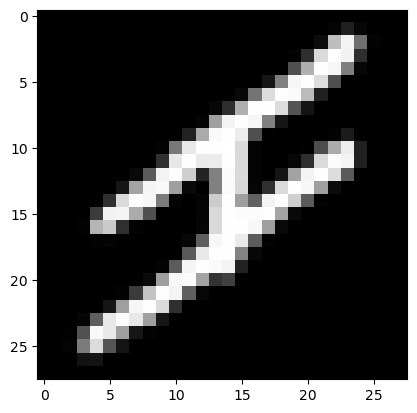

In [36]:
print("Label entry 30:", label_dictionary[sample_label])
plt.imshow(sample_image.values.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

Label entry 30: H


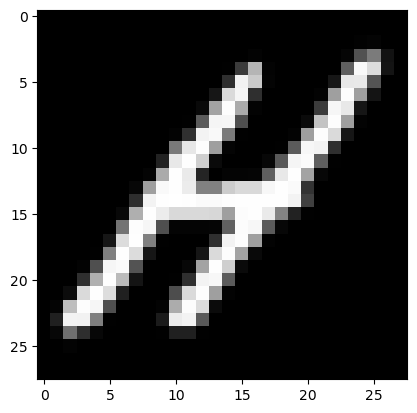

In [37]:
def reshape_and_rotate(image):
 
    image = image.reshape(28, 28)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

print("Label entry 30:", label_dictionary[sample_label])
plt.imshow(reshape_and_rotate(sample_image.values), cmap=plt.cm.gray)
plt.show()

 We  apply reshape_and_rotate to all images in X_train

In [38]:
# note: np.apply_along_axis returns a numpy array
# x_train is not a pandas.DataFrame anymore it's  numpy array
x_train = np.apply_along_axis(reshape_and_rotate, 1, x_train.values)
x_train.shape

(112800, 28, 28)

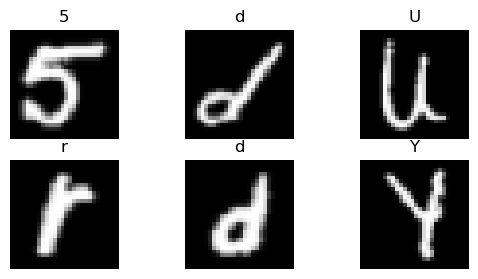

In [39]:
'''sample_image = X_train[41]
sample_label = y_train.iloc[41]
print("Label entry 41:", label_dictionary[sample_label])
plt.imshow(sample_image.reshape(28, 28), cmap=plt.cm.gray)
plt.show()'''


for i in range(102, 108):
    plt.subplot(3, 3, i-101)  # Adjust subplot indexing
    plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.gray)  # Reshape image before plotting
    plt.title(label_dictionary[y_train.iloc[i]])  # Access label directly from y_train
    plt.axis('off')  # Turn off axis
plt.show()

### Normalize Data

In [40]:
x_train = x_train.astype('float32') / 255
x_train

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

###  Encodage

#### One Hot Encode Label

In [41]:

number_of_classes = y_train.nunique() # nunique() :  function in pandas is used to count the number of unique values in a Series.
number_of_classes,y_train.unique()


(47,
 array([45, 36, 43, 15,  4, 42, 26, 32, 20,  1, 46, 13, 24, 12,  5, 17,  3,
        40, 14, 44, 19, 29, 25, 35, 28, 23, 22, 34,  9, 30, 38, 39, 37, 31,
        16,  7,  2,  8, 10,  6, 27, 33, 11, 18, 41,  0, 21], dtype=int64))

In [42]:
y_train = to_categorical(y_train, number_of_classes) # Convert labels to one-hot encoded format using to_categorical

y_train.shape



(112800, 47)

In [43]:
# Reshape to fit model input shape
# Tensorflow (batch, width, height, channels)
x_train= x_train.reshape(-1, 28, 28, 1)
x_train.shape


(112800, 28, 28, 1)

In [44]:
# Split 20% validation 
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size= 0.1, 
                                                  random_state=88)

###  Model
LeNet-5 is a convolutional neural network (CNN) architecture 

In [45]:
W = 28
H = 28

model = Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(W, H, 1)))

# Max pooling layer 1
model.add(layers.MaxPool2D(strides=2))

# Convolutional layer 2
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))

# Max pooling layer 2
model.add(layers.MaxPool2D(strides=2))

# Flatten layer
model.add(layers.Flatten())

# Fully connected layer 1
model.add(layers.Dense(256, activation='relu'))

# Fully connected layer 2
model.add(layers.Dense(84, activation='relu'))

# Output layer
model.add(layers.Dense(number_of_classes, activation='softmax'))

model.summary()


D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 48)          │          38,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         307,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          21,588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 47)                  │           3,995 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 372,319 (1.42 MB)

 Trainable params: 372,319 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Define the optimizer
optimizer_name = 'adam'

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
# Monitor validation loss ('val_loss')
# Stop training if val_loss doesn't improve for 5 epochs (patience=5)
# Print verbose messages during training (verbose=1)
# Minimize val_loss (mode='min')

# Define Model Checkpoint callback
mcp_save = ModelCheckpoint('my_model.keras', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')
# Save the best model as 'my_model.keras'
# Save only the best model based on validation loss (save_best_only=True)
# Monitor validation loss ('val_loss')
# Print verbose messages during training (verbose=1)
# Automatically determine whether to minimize or maximize val_loss (mode='auto')


In [47]:
model_fit = model.fit(x_train,y_train, epochs=30, batch_size=32, verbose=1, validation_split=0.1, callbacks=[early_stopping, mcp_save])

Epoch 1/30
2856/2856 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6820 - loss: 1.0762
Epoch 1: val_loss improved from inf to 0.40921, saving model to my_model.keras
2856/2856 ━━━━━━━━━━━━━━━━━━━━ 107s 36ms/step - accuracy: 0.6821 - loss: 1.0760 - val_accuracy: 0.8579 - val_loss: 0.4092
Epoch 2/30
2855/2856 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8629 - loss: 0.3834
Epoch 2: val_loss improved from 0.40921 to 0.36730, saving model to my_model.keras
2856/2856 ━━━━━━━━━━━━━━━━━━━━ 97s 34ms/step - accuracy: 0.8629 - loss: 0.3834 - val_accuracy: 0.8688 - val_loss: 0.3673
Epoch 3/30
2855/2856 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8818 - loss: 0.3186
Epoch 3: val_loss improved from 0.36730 to 0.34635, saving model to my_model.keras
2856/2856 ━━━━━━━━━━━━━━━━━━━━ 97s 34ms/step - accuracy: 0.8818 - loss: 0.3186 - val_accuracy: 0.8745 - val_loss: 0.3464
Epoch 4/30
2855/2856 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8934 - loss: 0.2802
Epoch 4: val_loss improved from 0.3

In [48]:
# plot accuracy and loss
def acc_loss(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
epochs = range(1,len(acc)+1)

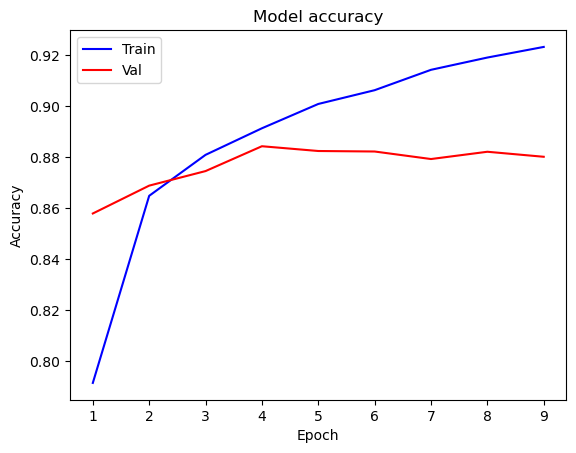

In [49]:
# Accuracy curve
acc_loss(epochs, acc, val_acc)

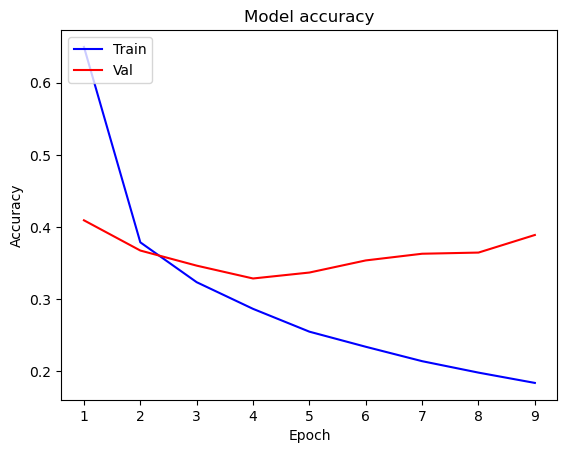

In [50]:
# loss curve
acc_loss(epochs, loss, val_loss)

## Test

In [51]:
#Loading the model after fitting it might be necessary in scenarios where you want to evaluate the model's performance 
model = load_model('my_model.keras')
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 10, 10, 48)          │          38,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 48)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         307,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          21,588 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 47)                  │           3,995 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,116,959 (4.26 MB)

 Trainable params: 372,319 (1.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 744,640 (2.84 MB)

In [52]:
y_pred = model.predict(x_val)
y_pred.shape

353/353 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


(11280, 47)

In [53]:
model.evaluate(x_val, y_val)

353/353 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8743 - loss: 0.3441


[0.35611817240715027, 0.873670220375061]

## scikit-learn Model

In [54]:
# Reshape x_train and x_val to 2D format
x_train_2d = x_train.reshape(x_train.shape[0], -1)
x_val_2d = x_val.reshape(x_val.shape[0], -1)

In [55]:
# one-hot encoded labels
y_train_flattened = np.argmax(y_train, axis=1)
y_val_flattened = np.argmax(y_val, axis=1)

   ### import scikit-learn

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

 ### Train the  Model

In [58]:
# Train a Support Vector Machine (SVM) classifier
svm_model = SVC()
svm_model.fit(x_train_2d, y_train_flattened)

SVC()

### Evaluate the Model


In [60]:
# Evaluate the scikit-learn model
svm_accuracy = svm_model.score(x_val_2d, y_val_flattened)
print("SVM Model Accuracy:", svm_accuracy)

SVM Model Accuracy: 0.8395390070921985
